In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from core.preprocessing import Preprocessor
from core.fit import Fit

In [2]:
df_init = pd.read_excel("excels/merged_for_angular.xlsx", index_col=[0])

In [3]:
df_init

,l,r,aver,1.000,2.000,3.000,4.000,5.000,6.000,7.000,...,5.000_2,6.000_2,7.000_2,8.000_2,9.000_2,10.000_2,11.000_2,12.000_2,13.000_2,14.000_2
0,0,8,4,389620000,859730000,1201000000,1713800000,2043300000,2110900000,1947700000,...,0,0,0,0,0,0,0,0,0,0
1,8,16,12,1115300000,2325200000,3139200000,4228900000,4705100000,4696800000,4317600000,...,0,0,0,0,0,0,0,0,0,0
2,16,24,20,1615600000,3165100000,4038600000,5060500000,5149900000,5073900000,4549000000,...,0,0,0,0,0,0,0,0,0,0
3,24,32,28,1928200000,3543300000,4229900000,4892900000,4839900000,4355200000,3919100000,...,0,0,0,0,0,0,0,0,0,0
4,32,40,36,2078500000,3628100000,4021400000,4215400000,3961800000,3621400000,3135800000,...,0,0,0,0,0,0,0,0,0,0
5,40,48,44,2081800000,3515600000,3737600000,3759200000,3356900000,2869100000,2439400000,...,0,0,0,0,0,0,0,0,0,0
6,48,56,52,1998300000,3227500000,3317700000,3191900000,2768200000,2334200000,1964400000,...,0,0,0,0,0,0,0,0,0,0
7,56,64,60,1884100000,3059800000,2902500000,2718900000,2324900000,1876500000,1600600000,...,0,0,0,0,0,0,0,0,0,0
8,64,72,68,1666700000,2728700000,2478300000,2278900000,1972800000,1546700000,1433600000,...,0,0,0,0,0,0,0,0,0,0
9,72,80,76,1400500000,2328200000,1937800000,1785600000,1570800000,1317900000,1150200000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pp = Preprocessor(df_init, "aver", dud=["l", "r"])

In [5]:
df, width, weights, groups = pp.angular_data()

In [6]:
groups, weights

([0.5,
  1.5,
  2.5,
  3.5,
  4.5,
  5.5,
  6.5,
  7.5,
  8.5,
  9.5,
  10.5,
  11.5,
  12.5,
  13.5,
  14.5],
 array([0.22359504, 0.18260696, 0.13139547, 0.10713669, 0.08263426,
        0.06270825, 0.04768731, 0.03814432, 0.0325586 , 0.02855513,
        0.02391783, 0.01688614, 0.01194482, 0.01022918]))

In [7]:
df

,aver,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000
0,0.052632,0.024112,0.030292,0.038737,0.050635,0.062498,0.070829,0.073616,0.072620,0.064280,0.065398,0.066179,0.060872,0.040930,0.026618
1,0.157895,0.069022,0.081927,0.101251,0.124945,0.143915,0.157597,0.163191,0.164243,0.148843,0.146154,0.156536,0.151376,0.119092,0.109608
2,0.263158,0.099984,0.111521,0.130261,0.149515,0.157520,0.170250,0.171937,0.175225,0.167887,0.177352,0.189635,0.187293,0.194694,0.217685
3,0.368421,0.119329,0.124847,0.136431,0.144564,0.148038,0.146135,0.148129,0.144372,0.150293,0.159539,0.167598,0.174742,0.186376,0.210453
4,0.473684,0.128631,0.127834,0.129706,0.124546,0.121180,0.121513,0.118523,0.114966,0.122299,0.125984,0.128606,0.122486,0.127727,0.141927
5,0.578947,0.128835,0.123871,0.120552,0.111068,0.102678,0.096270,0.092201,0.087391,0.095032,0.091894,0.085940,0.079025,0.077827,0.070678
6,0.684211,0.123668,0.113720,0.107009,0.094307,0.084671,0.078322,0.074248,0.072488,0.076865,0.066223,0.056573,0.056732,0.057342,0.054783
7,0.789474,0.116600,0.107811,0.093617,0.080332,0.071112,0.062964,0.060497,0.061581,0.062946,0.065190,0.054968,0.057862,0.064100,0.063358
8,0.894737,0.103146,0.096145,0.079935,0.067331,0.060342,0.051898,0.054185,0.059469,0.060132,0.054909,0.051557,0.058833,0.075293,0.061280
9,1.000000,0.086672,0.082033,0.062502,0.052757,0.048046,0.044221,0.043474,0.047645,0.051423,0.047355,0.042408,0.050779,0.056619,0.043609


In [8]:
df.to_excel("df_to_fit.xlsx")

In [9]:
coefs, y_f = Fit(df).df_fit("aver", width=width, weights=weights)

In [10]:
coefs

[[0.10000000048955529, 8152.787155561378, 0.22359503749469306, '1.000'],
 [0.1000000025913457, 3432.342655975853, 0.18260696034400967, '2.000'],
 [0.11049985284414834, 1.8877295366282634, 0.13139547322699127, '3.000'],
 [0.1233840194834479, 1.2720590369572469, 0.10713668710651418, '4.000'],
 [0.133150759075231, 1.0696674060459235, 0.08263425970523108, '5.000'],
 [0.142392542449646, 0.9459526638094151, 0.0627082517368143, '6.000'],
 [0.14485742011343158, 0.9183742779038956, 0.04768730699241585, '7.000'],
 [0.14330616427771453, 0.9324957933467913, 0.038144320802654105, '8.000'],
 [0.1370440081369257, 1.0103954257637864, 0.03255859611609169, '9.000'],
 [0.14136804465762978, 0.9571206162887478, 0.02855513482523697, '10.000'],
 [0.1499208814331797, 0.8713788020058301, 0.02391783414700457, '11.000'],
 [0.14495200178736473, 0.9157116223621874, 0.01688613751079402, '12.000'],
 [0.13290433324177925, 1.0709058537403717, 0.01194482184700729, '13.000'],
 [0.13957030180930258, 0.9825806614264948, 0

In [11]:
y_f

array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.09999999,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.09999999],
       [0.11041399, 0.10972948, 0.10837317, 0.10637008, 0.10375676,
        0.10058021, 0.09689647, 0.09276893, 0.0882666 , 0.08346213,
        0.11041399, 0.10972948, 0.10837317, 0.10637008, 0.10375676,
        0.10058021, 0.09689647, 0.09276893, 0.0882666 , 0.08346213],
       [0.12317298, 0.1214976 , 0.1182149 , 0.11345639, 0.10740833,
        0.10029961, 0.0923874 , 0.08394184, 0.07523094, 0.06650691,
        0.12317298, 0.1214976 , 0.1182149 , 0

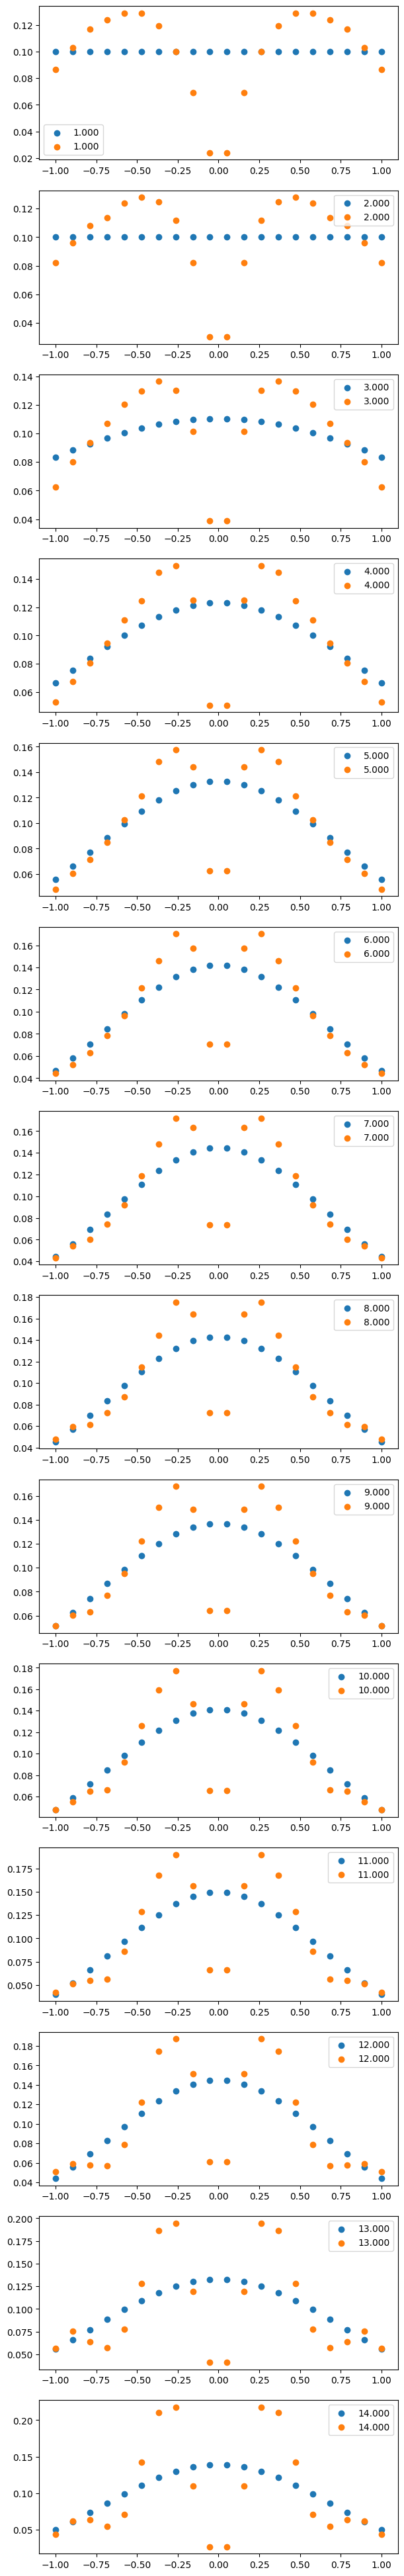

In [12]:
fig, axs = plt.subplots(len(y_f), 1, figsize=(7,50))
# cols = np.sort(np.array(list(set(df.columns).difference(set(["aver"])))))
cols = df.drop(["aver"], axis=1).columns
for i in range(len(y_f)):
    # blue - fitted
    axs[i].scatter(df["aver"], y_f[i], label=coefs[i][-1])
    axs[i].scatter(df["aver"], df.loc[:, cols].iloc[:, i], label=cols[i])
    axs[i].legend()

In [13]:
to_export = dict()
for i in range(len(y_f)):
    to_export[coefs[i][-1]] = y_f[i]

In [14]:
pd.DataFrame(data=to_export).to_excel("fitted_angular.xlsx")

In [15]:
df_i_deg_sr = pd.read_excel("excels/deg_sr_processed.xlsx", index_col=[0])

In [16]:
df_deg_sr, width_deg_sr, weights_deg_sr, groups_deg_sr = Preprocessor(df_i_deg_sr, "aver", dud=["l", "r"])\
    .angular_data(width=80)

In [17]:
df_deg_sr

,aver,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000
0,0.052632,0.197985,0.190645,0.178317,0.168147,0.161868,0.156931,0.155769,0.156621,0.159886,0.157779,0.153872,0.156454,0.163194,0.160061
1,0.157895,0.180825,0.175006,0.167172,0.159276,0.154091,0.149991,0.148998,0.149159,0.151664,0.150307,0.147346,0.148510,0.153954,0.153080
2,0.263158,0.160404,0.156676,0.152918,0.147954,0.144324,0.141847,0.140557,0.139845,0.142050,0.141644,0.139413,0.139305,0.141667,0.143272
3,0.368421,0.137319,0.136123,0.136225,0.134447,0.132813,0.131966,0.131134,0.130200,0.131985,0.131358,0.130955,0.130252,0.131206,0.133131
4,0.473684,0.112834,0.114443,0.117143,0.118589,0.119107,0.119674,0.119568,0.118847,0.119696,0.120910,0.122250,0.121376,0.121848,0.124362
5,0.578947,0.087327,0.090827,0.095647,0.099914,0.102487,0.104567,0.105206,0.105160,0.104502,0.106411,0.109026,0.109013,0.109147,0.113049
6,0.684211,0.061860,0.066456,0.072518,0.078972,0.082872,0.085498,0.086744,0.087154,0.084948,0.086533,0.089237,0.089849,0.088303,0.090332
7,0.789474,0.038234,0.042655,0.048190,0.054664,0.058909,0.062565,0.063670,0.064542,0.060918,0.061361,0.063449,0.062510,0.057888,0.056647
8,0.894737,0.018439,0.021394,0.024962,0.029523,0.033412,0.035847,0.036887,0.037098,0.034075,0.033379,0.034269,0.033207,0.026115,0.021805
9,1.000000,0.004774,0.005775,0.006907,0.008514,0.010117,0.011115,0.011467,0.011374,0.010277,0.010318,0.010183,0.009524,0.006680,0.004261


In [18]:
df_deg_sr.to_excel("df_to_fit.xlsx")

In [19]:
coefs_deg_sr, y_deg_sr = Fit(df_deg_sr).df_fit("aver", width=width_deg_sr, weights=weights_deg_sr)

In [20]:
coefs_deg_sr

[[0.1965017674465236, 49.545181556718, 0.19792099635060098, '1.000'],
 [0.189455792289005, 51.66184385181451, 0.16786241458963155, '2.000'],
 [0.18029747687080647, 54.84203366256621, 0.12913639535572682, '3.000'],
 [0.17156921025201594, 58.30079835292028, 0.11166347950995799, '4.000'],
 [0.16593021499950714, 60.83244155462623, 0.08946636314246979, '5.000'],
 [0.16189244267724837, 62.857529242781204, 0.07002902866035521, '6.000'],
 [0.16057625914697113, 63.5484816947494, 0.05365148518666961, '7.000'],
 [0.16041369814077025, 63.62119266538804, 0.04268153970052469, '8.000'],
 [0.16373089665602666, 61.93493400307772, 0.03568762996715154, '9.000'],
 [0.16262636471312486, 62.54338390448648, 0.03171727995644469, '10.000'],
 [0.15992839636628342, 64.026051362354, 0.02724112101021344, '11.000'],
 [0.16102644503025837, 63.43851398038851, 0.018914908998007077, '12.000'],
 [0.1667167719443295, 60.70337200548683, 0.012827363634652058, '13.000'],
 [0.16712265631744364, 60.70837792193525, 0.011199993

In [21]:
to_export = dict()
for i in range(len(y_deg_sr)):
    to_export[coefs_deg_sr[i][-1]] = y_deg_sr[i]

In [22]:
pd.DataFrame(data=to_export).to_excel("fitted_angular.xlsx")

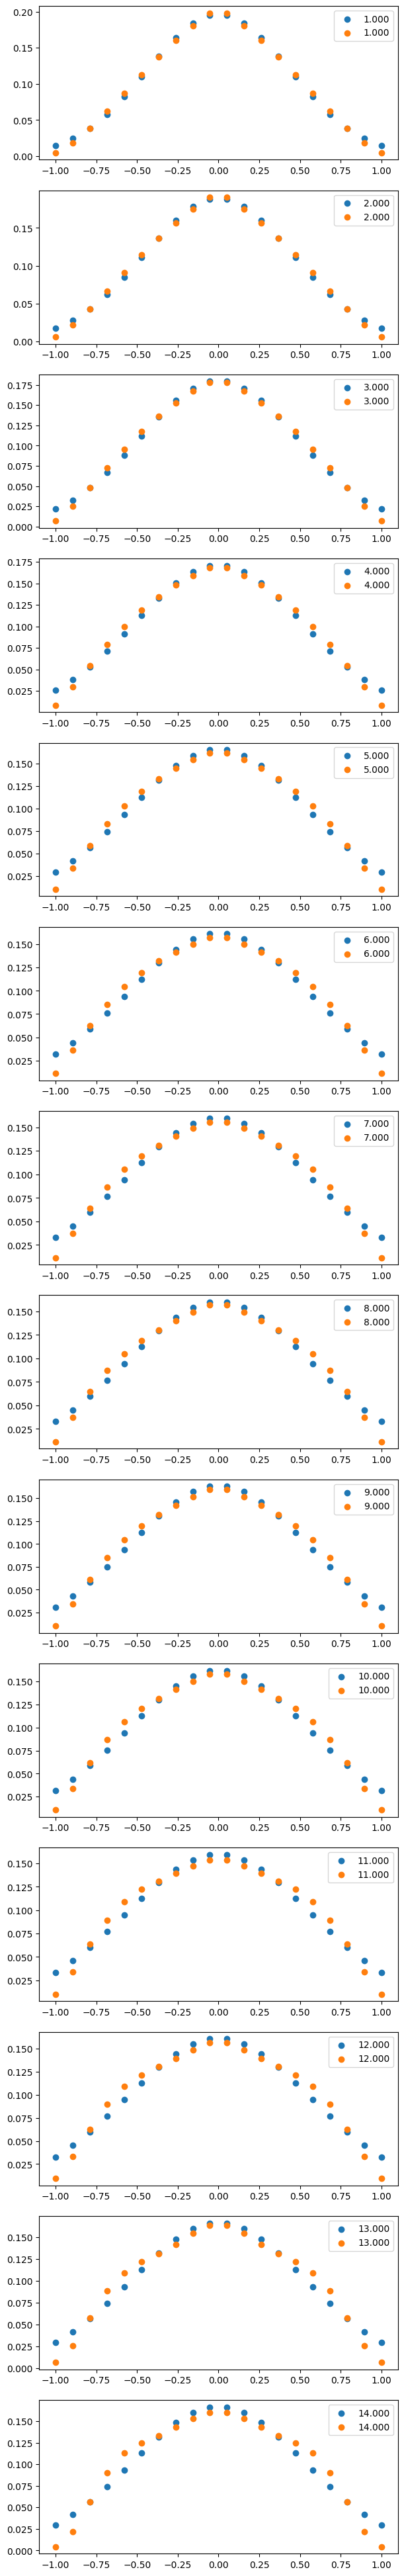

In [23]:
fig, axs = plt.subplots(len(y_f), 1, figsize=(7,50))
# cols = np.sort(np.array(list(set(df.columns).difference(set(["aver"])))))
cols = df_deg_sr.drop(["aver"], axis=1).columns
for i in range(len(y_f)):
    # blue - fitted
    axs[i].scatter(df_deg_sr["aver"], y_deg_sr[i], label=coefs_deg_sr[i][-1])
    axs[i].scatter(df_deg_sr["aver"], df_deg_sr.loc[:, cols].iloc[:, i], label=cols[i])
    axs[i].legend()

In [24]:
df_init_cos = pd.read_excel("excels/merged_for_angular_cos.xlsx", index_col=[0])

In [25]:
df_cos, width_cos, weights_cos, groups_cos = Preprocessor(df_init_cos, "aver").angular_data(cos=True)

In [26]:
df_cos.to_excel("df_to_fit_cos.xlsx")

In [27]:
coefs_cos, y_f_cos = Fit(df_cos).df_fit("aver", width_cos, weights_cos)

In [28]:
coefs_cos

[[0.0552610735174822, 0.7308398341961057, 0.22685339167007876, '1.000'],
 [0.05994183699668886, 0.6507529572377191, 0.18514814480347913, '2.000'],
 [0.07556530251953836, 0.4841578983830196, 0.13104432084172576, '3.000'],
 [0.10256555096163994, 0.3229770863106447, 0.10615110122798435, '4.000'],
 [0.1305303450396738, 0.2409820800827587, 0.08157241643056845, '5.000'],
 [0.15427544735725518, 0.20300701933924944, 0.06180089922709997, '6.000'],
 [0.16457042319102103, 0.18777978587088343, 0.04717737804305674, '7.000'],
 [0.16834568236199274, 0.1808390398444339, 0.03780313154813841, '8.000'],
 [0.14167038422042186, 0.21986739733235316, 0.032293437522022676, '9.000'],
 [0.1481262089843831, 0.2164260345381233, 0.02812261199975313, '10.000'],
 [0.16040374674426627, 0.20607713980384657, 0.023538588177559074, '11.000'],
 [0.15810192401412357, 0.2047776131005019, 0.016644581122357352, '12.000'],
 [0.13332054267326793, 0.23940363992006336, 0.011853290639356253, '13.000'],
 [0.13604664880059777, 0.251

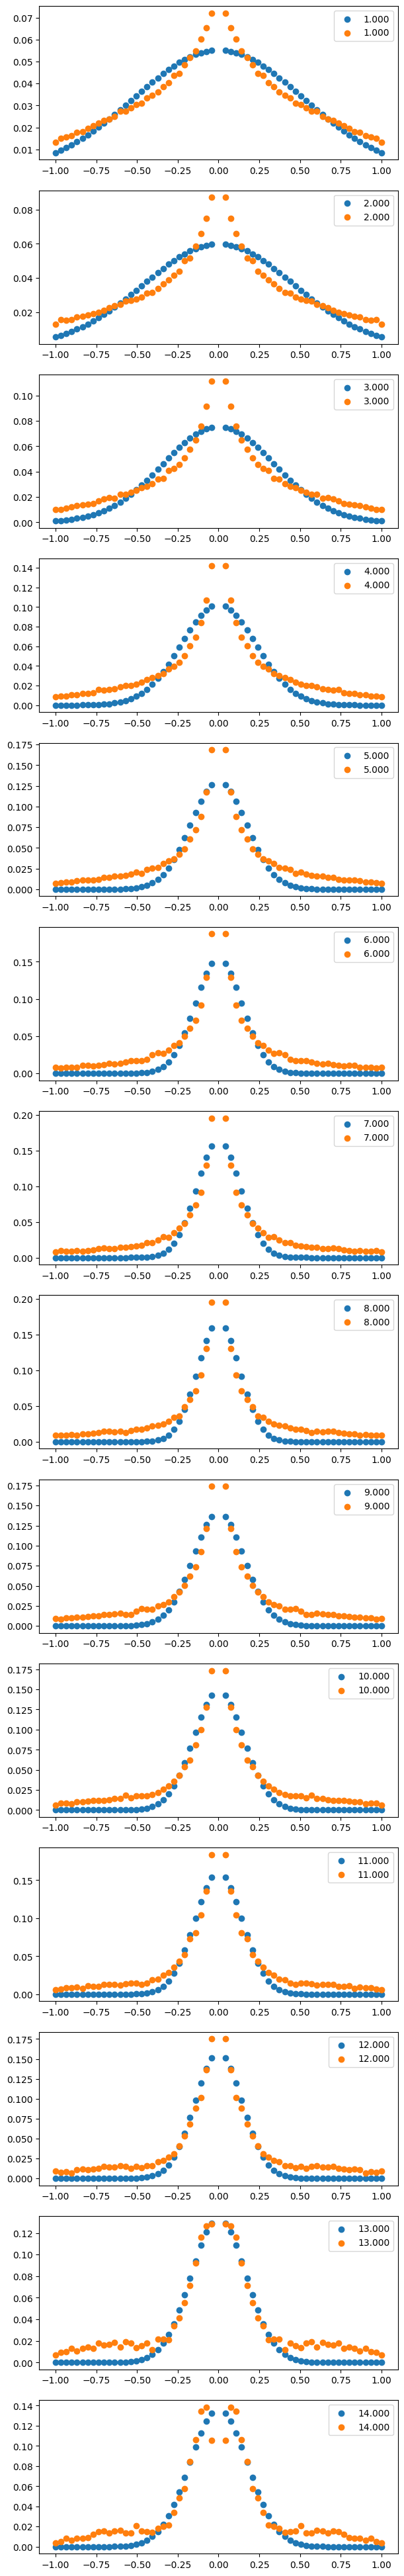

In [29]:
fig, axs = plt.subplots(len(y_f_cos), 1, figsize=(7,50))
# cols = np.sort(np.array(list(set(df.columns).difference(set(["aver"])))))
cols = df_cos.drop(["aver"], axis=1).columns
for i in range(len(y_f_cos)):
    # blue - fitted
    axs[i].scatter(df_cos["aver"], y_f_cos[i], label=coefs_cos[i][-1])
    axs[i].scatter(df_cos["aver"], df_cos.loc[:, cols].iloc[:, i], label=cols[i])
    axs[i].legend()

In [30]:
to_export = dict()
for i in range(len(y_f_cos)):
    to_export[coefs_cos[i][-1]] = y_f_cos[i]

In [31]:
pd.DataFrame(data=to_export).to_excel("fitted_angular_cos.xlsx")